<a href="https://colab.research.google.com/github/ssahin7/GenerativeAIProject/blob/main/HibritmodelVeDCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Üretken Yapay Zeka Final Projesi

İsim : Şevval ŞAHİN

Okul Numarası: 220212034

Proje : İki farklı kaynaktan alınan görüntülerle var olmayan bir insan fotoğrafı oluşturulması.

# Kütüphanelerin Kurulması

In [ ]:
!pip install torch torchvision moviepy insightface timm==0.5.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB

In [ ]:
!pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.0 MB/s eta 0:00:00


# 2.Veri Setinin Oluşturulması


*   Emma Watson'un Video Görüntülerinden Yüzüne Ait Fotoğraf Karelerinin Çıkarılması
*   Şevval Şahin'in  Video Görüntülerinden Yüzüne Ait Fotoğraf Karelerinin Çıkarılması

*   Verilerin Eşit Sayıda Olması İçin Fazla Verinin Düzenlenmesi



In [ ]:
import cv2
import os


video_paths = [
    "/content/drive/MyDrive/Videolar/S001.mp4",
    "/content/drive/MyDrive/Videolar/S002.mp4",
    "/content/drive/MyDrive/Videolar/S004.mp4"


]


output_dir = 'extracted_faces_allsevvalsahin1'
os.makedirs(output_dir, exist_ok=True)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

count = 0

for video_path in video_paths:
    cap = cv2.VideoCapture(video_path)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            face_img = frame[y:y+h, x:x+w]

            cv2.imwrite(f'{output_dir}/face_{count}.jpg', face_img)
            count += 1

            break

    cap.release()

print(f'Toplam {count} yüz karesi çıkarıldı ve "{output_dir}" klasörüne kaydedildi.')



Toplam 1027 yüz karesi çıkarıldı ve "extracted_faces_allsevvalsahin1" klasörüne kaydedildi.


In [ ]:
import cv2
import os

video_paths = [
    "/content/drive/MyDrive/Videolar/id11_0004.mp4",
    "/content/drive/MyDrive/Videolar/id11_0005.mp4",
    "/content/drive/MyDrive/Videolar/id11_0010.mp4"
]


output_dir = 'extracted_faces_allemmawatson1'
os.makedirs(output_dir, exist_ok=True)


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

count = 0

for video_path in video_paths:
    cap = cv2.VideoCapture(video_path)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            face_img = frame[y:y+h, x:x+w]

            cv2.imwrite(f'{output_dir}/face_{count}.jpg', face_img)
            count += 1

            break

    cap.release()

print(f'Toplam {count} yüz karesi çıkarıldı ve "{output_dir}" klasörüne kaydedildi.')


Toplam 993 yüz karesi çıkarıldı ve "extracted_faces_allemmawatson1" klasörüne kaydedildi.


In [ ]:
import os

folder_path = '/content/SimSwap/extracted_faces_allsevvalsahin1'
max_photos = 993


files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f'Toplam fotoğraf sayısı: {len(files)}')

if len(files) > max_photos:

    num_to_delete = len(files) - max_photos

    files.sort()


    files_to_delete = files[:num_to_delete]

    for file_name in files_to_delete:
        file_path = os.path.join(folder_path, file_name)
        os.remove(file_path)

    print(f'{num_to_delete} dosya silindi, klasörde {max_photos} dosya kaldı.')
else:
    print('Fotoğraf sayısı 993 veya daha az, silinecek dosya yok.')


Toplam fotoğraf sayısı: 1027
34 dosya silindi, klasörde 993 dosya kaldı.


# Customize Edilmiş DCGAN , Yüz Değiştirme Modeli

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt
import os


class FaceSwapDataset(Dataset):
    def __init__(self, src_dir, ref_dir, transform=None):
        self.src_dir = src_dir
        self.ref_dir = ref_dir
        self.transform = transform
        self.src_imgs = sorted(os.listdir(src_dir))
        self.ref_imgs = sorted(os.listdir(ref_dir))
        assert len(self.src_imgs) == len(self.ref_imgs), "Kaynak ve referans sayısı eşit olmalı!"

    def __len__(self):
        return len(self.src_imgs)

    def __getitem__(self, idx):
        src_path = os.path.join(self.src_dir, self.src_imgs[idx])
        ref_path = os.path.join(self.ref_dir, self.ref_imgs[idx])
        src_img = Image.open(src_path).convert('RGB')
        ref_img = Image.open(ref_path).convert('RGB')
        if self.transform:
            src_img = self.transform(src_img)
            ref_img = self.transform(ref_img)
        return src_img, ref_img

class FaceSwapModel(nn.Module):
    def __init__(self):
        super(FaceSwapModel, self).__init__()
        self.enc1 = nn.Sequential(nn.Conv2d(3, 64, 4, 2, 1), nn.ReLU(True))
        self.enc2 = nn.Sequential(nn.Conv2d(64, 128, 4, 2, 1), nn.ReLU(True))
        self.enc3 = nn.Sequential(nn.Conv2d(128, 256, 4, 2, 1), nn.ReLU(True))
        self.enc4 = nn.Sequential(nn.Conv2d(256, 512, 4, 2, 1), nn.ReLU(True))

        self.dec4 = nn.Sequential(nn.ConvTranspose2d(512, 256, 4, 2, 1), nn.ReLU(True))
        self.dec3 = nn.Sequential(nn.ConvTranspose2d(512, 128, 4, 2, 1), nn.ReLU(True))
        self.dec2 = nn.Sequential(nn.ConvTranspose2d(256, 64, 4, 2, 1), nn.ReLU(True))
        self.dec1 = nn.Sequential(nn.ConvTranspose2d(128, 3, 4, 2, 1), nn.Tanh())

    def forward(self, src_img, ref_img):
        src1 = self.enc1(src_img)
        src2 = self.enc2(src1)
        src3 = self.enc3(src2)
        src4 = self.enc4(src3)

        ref1 = self.enc1(ref_img)
        ref2 = self.enc2(ref1)
        ref3 = self.enc3(ref2)
        ref4 = self.enc4(ref3)

        fused = src4 + ref4

        d4 = self.dec4(fused)
        d4 = self._crop_and_concat(d4, src3)

        d3 = self.dec3(d4)
        d3 = self._crop_and_concat(d3, src2)

        d2 = self.dec2(d3)
        d2 = self._crop_and_concat(d2, src1)

        out = self.dec1(d2)
        return out

    def _crop_and_concat(self, upsampled, bypass):
        if upsampled.size(2) != bypass.size(2) or upsampled.size(3) != bypass.size(3):
            diff_y = bypass.size(2) - upsampled.size(2)
            diff_x = bypass.size(3) - upsampled.size(3)
            bypass = bypass[:, :, diff_y // 2 : bypass.size(2) - (diff_y - diff_y // 2),
                            diff_x // 2 : bypass.size(3) - (diff_x - diff_x // 2)]
        return torch.cat([upsampled, bypass], dim=1)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 1, 4, 1, 1),
        )

    def forward(self, x):
        return self.model(x)
class IdentityFeatureExtractor(nn.Module):
    def __init__(self, layers):
        super(IdentityFeatureExtractor, self).__init__()
        self.layers = layers

    def forward(self, x):
        feats = []
        for layer in self.layers:
            x = layer(x)
            feats.append(x)
        return feats

def identity_loss_fn(output, target, extractor):
    out_feats = extractor(output)
    tgt_feats = extractor(target)
    loss = 0
    for o, t in zip(out_feats, tgt_feats):
        loss += F.l1_loss(o, t)
    return loss


In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((125, 125)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

src_folder = "/content/SimSwap/extracted_faces_allsevvalsahin1"
ref_folder = "/content/SimSwap/extracted_faces_allemmawatson1"

dataset = FaceSwapDataset(src_folder, ref_folder, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


generator = FaceSwapModel().to(device)
discriminator = Discriminator().to(device)
id_extractor = IdentityFeatureExtractor([
    generator.enc1, generator.enc2, generator.enc3, generator.enc4
]).to(device)

mse_loss = nn.MSELoss()
adv_loss = nn.BCEWithLogitsLoss()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


lambda_recon = 1.0
lambda_id = 0.5
lambda_adv = 0.1


num_epochs = 50
for epoch in range(num_epochs):
    generator.train()
    discriminator.train()
    running_loss = 0

    for src, ref in dataloader:
        src, ref = src.to(device), ref.to(device)


        optimizer_D.zero_grad()
        real_pred = discriminator(ref)
        fake_img = generator(src, ref).detach()
        fake_pred = discriminator(fake_img)

        real_labels = torch.ones_like(real_pred)
        fake_labels = torch.zeros_like(fake_pred)

        d_loss_real = adv_loss(real_pred, real_labels)
        d_loss_fake = adv_loss(fake_pred, fake_labels)
        d_loss = (d_loss_real + d_loss_fake) * 0.5
        d_loss.backward()
        optimizer_D.step()


        optimizer_G.zero_grad()
        output = generator(src, ref)
        output = F.interpolate(output, size=(125, 125), mode='bilinear', align_corners=False)  # <<== Eklenen satır
        pred_fake = discriminator(output)

        real_labels_g = torch.ones_like(pred_fake)
        g_adv = adv_loss(pred_fake, real_labels_g)
        g_recon = mse_loss(output, src)
        g_id = identity_loss_fn(output, ref, id_extractor)


        g_total = lambda_recon * g_recon + lambda_id * g_id + lambda_adv * g_adv
        g_total.backward()
        optimizer_G.step()

        running_loss += g_total.item() * src.size(0)

    avg_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{num_epochs} - G_Loss: {avg_loss:.4f} - D_Loss: {d_loss.item():.4f}")


torch.save(generator.state_dict(), "face_swap_generator.pth")


Epoch 1/50 - G_Loss: 0.0915 - D_Loss: 0.1264
Epoch 2/50 - G_Loss: 0.0288 - D_Loss: 0.0449
Epoch 3/50 - G_Loss: 0.0164 - D_Loss: 0.0173
Epoch 4/50 - G_Loss: 0.0207 - D_Loss: 0.0409
Epoch 5/50 - G_Loss: 0.0133 - D_Loss: 0.0906
Epoch 6/50 - G_Loss: 0.0097 - D_Loss: 0.0262
Epoch 7/50 - G_Loss: 0.0075 - D_Loss: 0.0096
Epoch 8/50 - G_Loss: 0.0446 - D_Loss: 0.0499
Epoch 9/50 - G_Loss: 0.0105 - D_Loss: 0.0038
Epoch 10/50 - G_Loss: 0.0119 - D_Loss: 0.0025
Epoch 11/50 - G_Loss: 0.0082 - D_Loss: 0.0024
Epoch 12/50 - G_Loss: 0.0083 - D_Loss: 0.0055
Epoch 13/50 - G_Loss: 0.0190 - D_Loss: 0.0065
Epoch 14/50 - G_Loss: 0.0084 - D_Loss: 0.0091
Epoch 15/50 - G_Loss: 0.0066 - D_Loss: 0.0006
Epoch 16/50 - G_Loss: 0.0179 - D_Loss: 0.0072
Epoch 17/50 - G_Loss: 0.0089 - D_Loss: 0.0021
Epoch 18/50 - G_Loss: 0.0067 - D_Loss: 0.0005
Epoch 19/50 - G_Loss: 0.0427 - D_Loss: 0.0130
Epoch 20/50 - G_Loss: 0.0142 - D_Loss: 0.0013
Epoch 21/50 - G_Loss: 0.0086 - D_Loss: 0.0010
Epoch 22/50 - G_Loss: 0.0067 - D_Loss: 0.00

In [ ]:
generator = FaceSwapModel().to(device)
generator.load_state_dict(torch.load("face_swap_generator.pth", map_location=device))
generator.eval()


FaceSwapModel(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (enc4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (dec4): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (dec3): Sequential(
    (0): ConvTranspose2d(512, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (dec2): Sequential(
    (0): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (dec1): Sequential(
    (0): ConvTranspose2d

In [ ]:
from PIL import Image

def load_and_preprocess(image_path):
    img = Image.open(image_path).convert("RGB")
    img = transform(img).unsqueeze(0).to(device)
    return img


In [ ]:
import torchvision.utils as vutils
import torch.nn.functional as F


src_path = "/content/SimSwap/extracted_faces_allsevvalsahin1/face_104.jpg"
ref_path = "/content/SimSwap/extracted_faces_allemmawatson1/face_104.jpg"


src = load_and_preprocess(src_path)
ref = load_and_preprocess(ref_path)


with torch.no_grad():
    output = generator(src, ref)
    output = F.interpolate(output, size=(125, 125), mode='bilinear', align_corners=False)


vutils.save_image(output, "swapped_output.jpg", normalize=True)


# Customize DCGAN Model Çıktısı

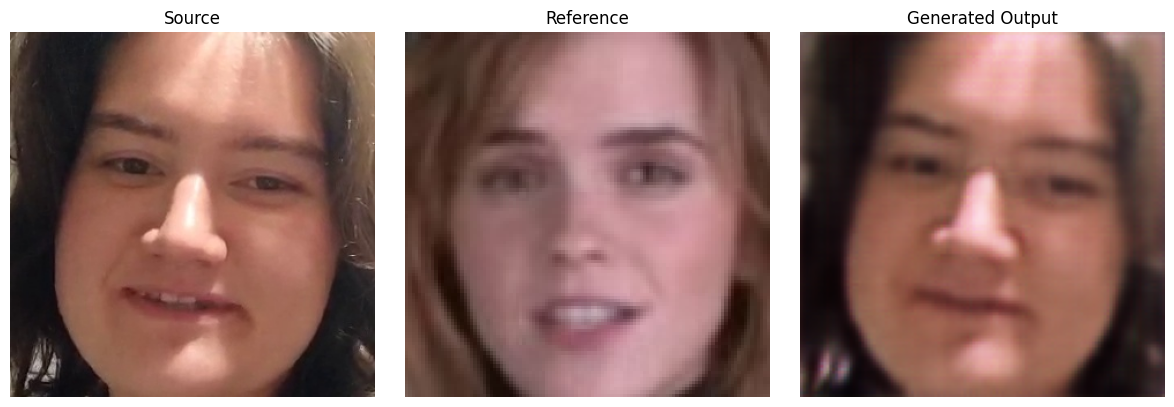

In [ ]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.utils as vutils


generator = FaceSwapModel().to(device)
generator.load_state_dict(torch.load("face_swap_generator.pth", map_location=device))
generator.eval()


transform = transforms.Compose([
    transforms.Resize((125, 125)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


def load_and_preprocess(image_path):
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img, img_tensor

src_path = "/content/SimSwap/extracted_faces_allsevvalsahin1/face_104.jpg"
ref_path = "/content/SimSwap/extracted_faces_allemmawatson1/face_104.jpg"

src_img_pil, src = load_and_preprocess(src_path)
ref_img_pil, ref = load_and_preprocess(ref_path)

#  Üretim
with torch.no_grad():
    output = generator(src, ref)
    output = F.interpolate(output, size=(125, 125), mode='bilinear', align_corners=False)

vutils.save_image(output, "swapped_output.jpg", normalize=True)

# Ekranda Gösterim
output_img = output.squeeze(0).detach().cpu()
output_img = output_img * 0.5 + 0.5  # [-1, 1] -> [0, 1]
output_img_np = output_img.permute(1, 2, 0).numpy()

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Source")
plt.imshow(src_img_pil)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Reference")
plt.imshow(ref_img_pil)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Generated Output")
plt.imshow(output_img_np)
plt.axis("off")

plt.tight_layout()
plt.show()


# VAE VE GAN Modelinden Hibrit Model Üretimi
# (Self Atenttion Mekanizması da Modele dahildir)

*   Veri Setinin Yüklenmesi
*   Self Attention
*   VAE Encoder Ve Decoder (arttırılmış konvolüsyonel katmanlar)
*   Discriminator Ayarları
*   Model Ayarları
*   Gradyan Kırpma Ve Kl Ayarları
*   VAE + GAN loss birlikte










In [ ]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image


In [ ]:
class CustomFaceDataset(Dataset):
    def __init__(self, folders, transform=None):
        self.image_paths = []
        for folder in folders:
            for file in os.listdir(folder):
                if file.lower().endswith((".jpg", ".jpeg", ".png")):
                    self.image_paths.append(os.path.join(folder, file))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image


In [ ]:
class SelfAttention(nn.Module):
    def __init__(self, in_dim):
        super(SelfAttention, self).__init__()
        self.query = nn.Conv2d(in_dim, in_dim // 8, 1)
        self.key = nn.Conv2d(in_dim, in_dim // 8, 1)
        self.value = nn.Conv2d(in_dim, in_dim, 1)
        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        B, C, W, H = x.size()
        query = self.query(x).view(B, -1, W * H).permute(0, 2, 1)
        key = self.key(x).view(B, -1, W * H)
        attention = torch.bmm(query, key)
        attention = F.softmax(attention, dim=-1)
        value = self.value(x).view(B, -1, W * H)

        out = torch.bmm(value, attention.permute(0, 2, 1)).view(B, C, W, H)
        return self.gamma * out + x


In [ ]:
class VAEEncoder(nn.Module):
    def __init__(self, latent_dim=100):
        super(VAEEncoder, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.ReLU(),
            SelfAttention(64),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_mu = nn.Linear(256 * 16 * 16, latent_dim)
        self.fc_logvar = nn.Linear(256 * 16 * 16, latent_dim)

    def forward(self, x):
        x = self.model(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar


In [ ]:
class VAEDecoder(nn.Module):
    def __init__(self, latent_dim, img_channels=3):
        super(VAEDecoder, self).__init__()
        self.decoder_input = nn.Linear(latent_dim, 256 * 4 * 4)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (256, 4, 4)),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 4, 2, 1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.ConvTranspose2d(16, img_channels, 4, 2, 1),  #
            nn.Tanh()
        )

    def forward(self, z):
        x = self.decoder_input(z)
        x = self.decoder(x)
        return x


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.LeakyReLU(0.2),
            SelfAttention(64),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 1, 4, 2, 0),
            nn.Sigmoid(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten()
        )

    def forward(self, x):
        return self.model(x).view(-1, 1).squeeze(1)


In [ ]:
def reparameterize(mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std


In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


dataset = CustomFaceDataset([
    "/content/drive/MyDrive/FinalFaces/Sevval2",
    "/content/drive/MyDrive/extracted_faces_allemmawatson2"
], transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


In [ ]:
import torch
from torchvision.utils import save_image
import torch.nn as nn

torch.autograd.set_detect_anomaly(True)


latent_dim = 50
encoder = VAEEncoder(latent_dim).to(device)
decoder = VAEDecoder(latent_dim=latent_dim, img_channels=3).to(device)
discriminator = Discriminator().to(device)

opt_enc = torch.optim.Adam(encoder.parameters(), lr=0.0005)
opt_dec = torch.optim.Adam(decoder.parameters(), lr=0.0005)
opt_disc = torch.optim.Adam(discriminator.parameters(), lr=0.0005)

bce_loss = nn.BCELoss()
mse_loss = nn.MSELoss()

for epoch in range(50):
    kl_weight = min(1.0, epoch / 10) * 0.1  # KL kaybı ağırlığını yavaşça artır

    for imgs in dataloader:
        imgs = imgs.to(device)
        batch_size = imgs.size(0)


        mu, logvar = encoder(imgs)
        logvar = torch.clamp(logvar, min=-10, max=10)
        z = reparameterize(mu, logvar)
        recon_imgs = decoder(z)

        recon_loss = mse_loss(recon_imgs, imgs)
        kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / batch_size
        vae_loss = recon_loss + kl_weight * kl_loss


        opt_enc.zero_grad()
        opt_dec.zero_grad()


        vae_loss.backward(retain_graph=True)

        # Gradyan kırpma
        torch.nn.utils.clip_grad_norm_(encoder.parameters(), 1.0)
        torch.nn.utils.clip_grad_norm_(decoder.parameters(), 1.0)


        real_labels = torch.ones(batch_size).to(device)
        fake_labels = torch.zeros(batch_size).to(device)

        outputs_real = discriminator(imgs)
        outputs_fake = discriminator(recon_imgs.detach())

        d_loss_real = bce_loss(outputs_real, real_labels)
        d_loss_fake = bce_loss(outputs_fake, fake_labels)
        d_loss = (d_loss_real + d_loss_fake) / 2

        opt_disc.zero_grad()
        d_loss.backward()
        opt_disc.step()

        # Generator (decoder)
        outputs = discriminator(recon_imgs)
        g_loss = bce_loss(outputs, real_labels)

        #  (VAE + GAN loss birlikte)
        opt_dec.zero_grad()
        (vae_loss + g_loss).backward()
        torch.nn.utils.clip_grad_norm_(decoder.parameters(), 1.0)
        opt_dec.step()

        # Encoder optimizasyonu
        opt_enc.step()

    print(f"[{epoch+1}/50] VAE Loss: {vae_loss.item():.4f}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")


    if (epoch + 1) % 10 == 0:
        save_image((recon_imgs[:16] + 1) / 2, f"/content/epoch_{epoch+1}.png")




[1/50] VAE Loss: 0.3655, D Loss: 0.1194, G Loss: 2.0372
[2/50] VAE Loss: 666.0165, D Loss: 0.0397, G Loss: 2.9331
[3/50] VAE Loss: 665.4413, D Loss: 0.0286, G Loss: 3.8325
[4/50] VAE Loss: 998.0730, D Loss: 0.1136, G Loss: 3.3784
[5/50] VAE Loss: 1330.2637, D Loss: 0.0957, G Loss: 2.9627
[6/50] VAE Loss: 1662.1870, D Loss: 0.0769, G Loss: 3.1876
[7/50] VAE Loss: 1996.8114, D Loss: 0.1375, G Loss: 2.4782
[8/50] VAE Loss: 2326.8174, D Loss: 0.1108, G Loss: 2.8729
[9/50] VAE Loss: 2659.6782, D Loss: 0.2211, G Loss: 1.5542
[10/50] VAE Loss: 2993.3381, D Loss: 0.0953, G Loss: 3.4452
[11/50] VAE Loss: 3325.6980, D Loss: 0.1635, G Loss: 3.2696
[12/50] VAE Loss: 3324.4333, D Loss: 0.1745, G Loss: 2.8163
[13/50] VAE Loss: 3324.8350, D Loss: 0.1796, G Loss: 1.9377
[14/50] VAE Loss: 3330.1982, D Loss: 0.1702, G Loss: 2.7038
[15/50] VAE Loss: 3325.3860, D Loss: 0.2547, G Loss: 1.7500
[16/50] VAE Loss: 3325.3728, D Loss: 0.2381, G Loss: 2.1012
[17/50] VAE Loss: 3323.7961, D Loss: 0.2643, G Loss: 1.

In [ ]:
import os

save_dir = "/content/drive/MyDrive/vae_dcgan_hybrid"
os.makedirs(save_dir, exist_ok=True)


In [ ]:
torch.save(encoder.state_dict(), os.path.join(save_dir, "encoder.pth"))
torch.save(decoder.state_dict(), os.path.join(save_dir, "decoder.pth"))
torch.save(discriminator.state_dict(), os.path.join(save_dir, "discriminator.pth"))


In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def save_sample_outputs(images, epoch):
    grid = make_grid((images[:16] + 1) / 2, nrow=4)
    save_image(grid, f"/content/drive/MyDrive/vae_dcgan_hybrid/output_epoch{epoch}.png")


# Hibrit Modelin Üretimi

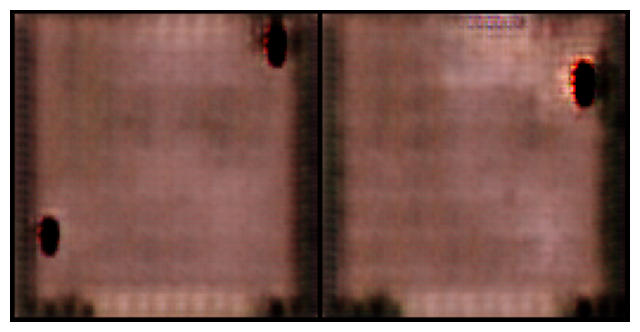

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_output(images):
    grid = make_grid((images[:16] + 1) / 2, nrow=4)
    npimg = grid.cpu().numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()


show_output(recon_imgs)
